In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (10, 7)
import seaborn as sns
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False})
import mglearn

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

### KNN(K-Nearest Neighbor, K-최근접 이웃 알고리즘)
- 새로운 데이터를 입력 받았을 때 가장 가까이 있는 데이터가 무엇이냐를 중심으로 새로운 데이터를 예측 하는 알고리즘
- KNN에서 K는 주변의 개수를 의미 
- 최적의 K값을 찾는 것이 문제다

In [18]:
# 가상 데이터 불러오기
x, y = mglearn.datasets.make_forge()
x, y

/Users/dongja/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


(array([[ 9.96346605,  4.59676542],
        [11.0329545 , -0.16816717],
        [11.54155807,  5.21116083],
        [ 8.69289001,  1.54322016],
        [ 8.1062269 ,  4.28695977],
        [ 8.30988863,  4.80623966],
        [11.93027136,  4.64866327],
        [ 9.67284681, -0.20283165],
        [ 8.34810316,  5.13415623],
        [ 8.67494727,  4.47573059],
        [ 9.17748385,  5.09283177],
        [10.24028948,  2.45544401],
        [ 8.68937095,  1.48709629],
        [ 8.92229526, -0.63993225],
        [ 9.49123469,  4.33224792],
        [ 9.25694192,  5.13284858],
        [ 7.99815287,  4.8525051 ],
        [ 8.18378052,  1.29564214],
        [ 8.7337095 ,  2.49162431],
        [ 9.32298256,  5.09840649],
        [10.06393839,  0.99078055],
        [ 9.50048972, -0.26430318],
        [ 8.34468785,  1.63824349],
        [ 9.50169345,  1.93824624],
        [ 9.15072323,  5.49832246],
        [11.563957  ,  1.3389402 ]]),
 array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 

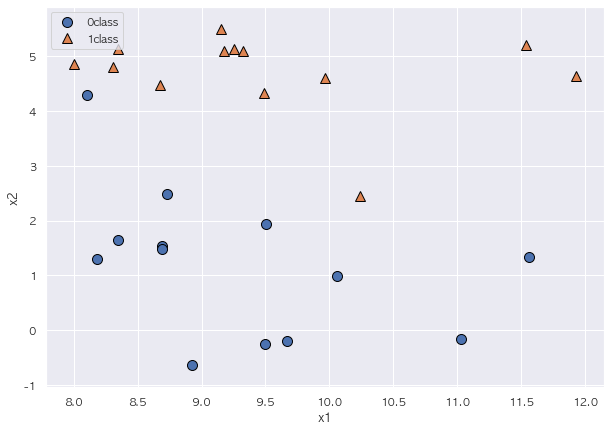

In [20]:
# 입출력 데이터 시각화
mglearn.discrete_scatter(x[:,0], x[:,1], y)
plt.legend(['0class', '1class'])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

/Users/dongja/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


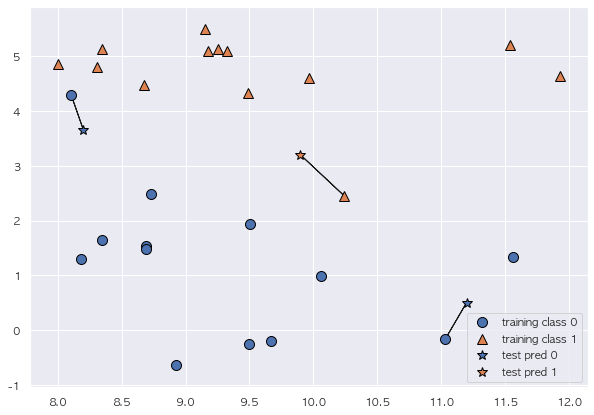

In [16]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

- 최근접 이웃 개수: 1
- 별 모양이 새로운 데이터
- 유클리드 거리가 가장 가까운 데이터로 분류

/Users/dongja/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


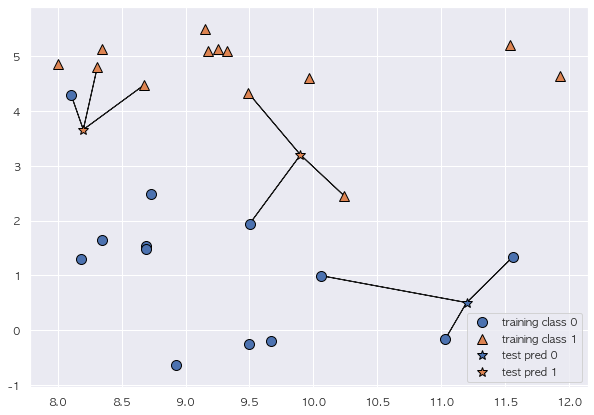

In [21]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

- 최근접 이웃 개수: 3
- 인접한 3개의 데이터 중 다수결의 원칙에 따라 분류

In [22]:
# train, test 데이터셋 구성
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

In [25]:
# knn 모델 학습
param_grid = {
    'n_neighbors': range(1, 11)
}
model_grid_knn =GridSearchCV(KNeighborsClassifier(), param_grid, scoring='f1')
model_grid_knn.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 11)}, scoring='f1')

In [26]:
best_model = model_grid_knn.best_estimator_
best_model

KNeighborsClassifier(n_neighbors=3)

In [27]:
best_model.score(x_train, y_train), best_model.score(x_test, y_test)

(0.9, 1.0)

In [48]:
# 예측값
y_pred = best_model.predict(x_test) 
y_pred

array([1, 0, 1, 1, 0, 0])

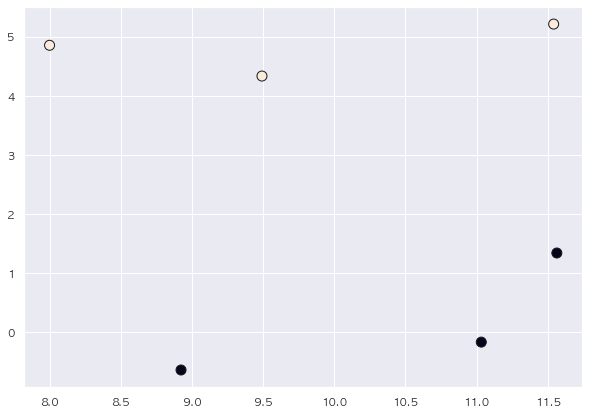

In [45]:
# 테스트 테이터 실제값 시각화
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, edgecolors='k', s=100)
plt.show()

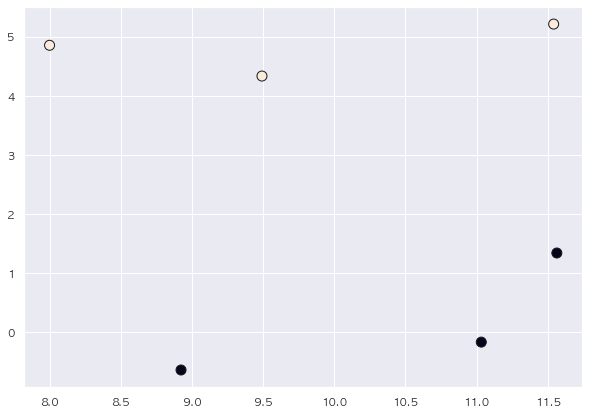

In [54]:
# 테스트 데이터에 대한 예측값 시각화
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_pred, edgecolors='k', s=100)
plt.show()